<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1: Numerical Differentiation Problem Statement**\
Numerical differentiation is used to approximate the derivative of a function at certain points. Since we are using computers we compute the derivative at discrete values, even if the function is continuous. It is helpful to remember that a derivative is a slope of a curve at a certain point which tells us the rate the function is changing at that certain point.

**20.2: Finite Difference Approximating Derivatives**\
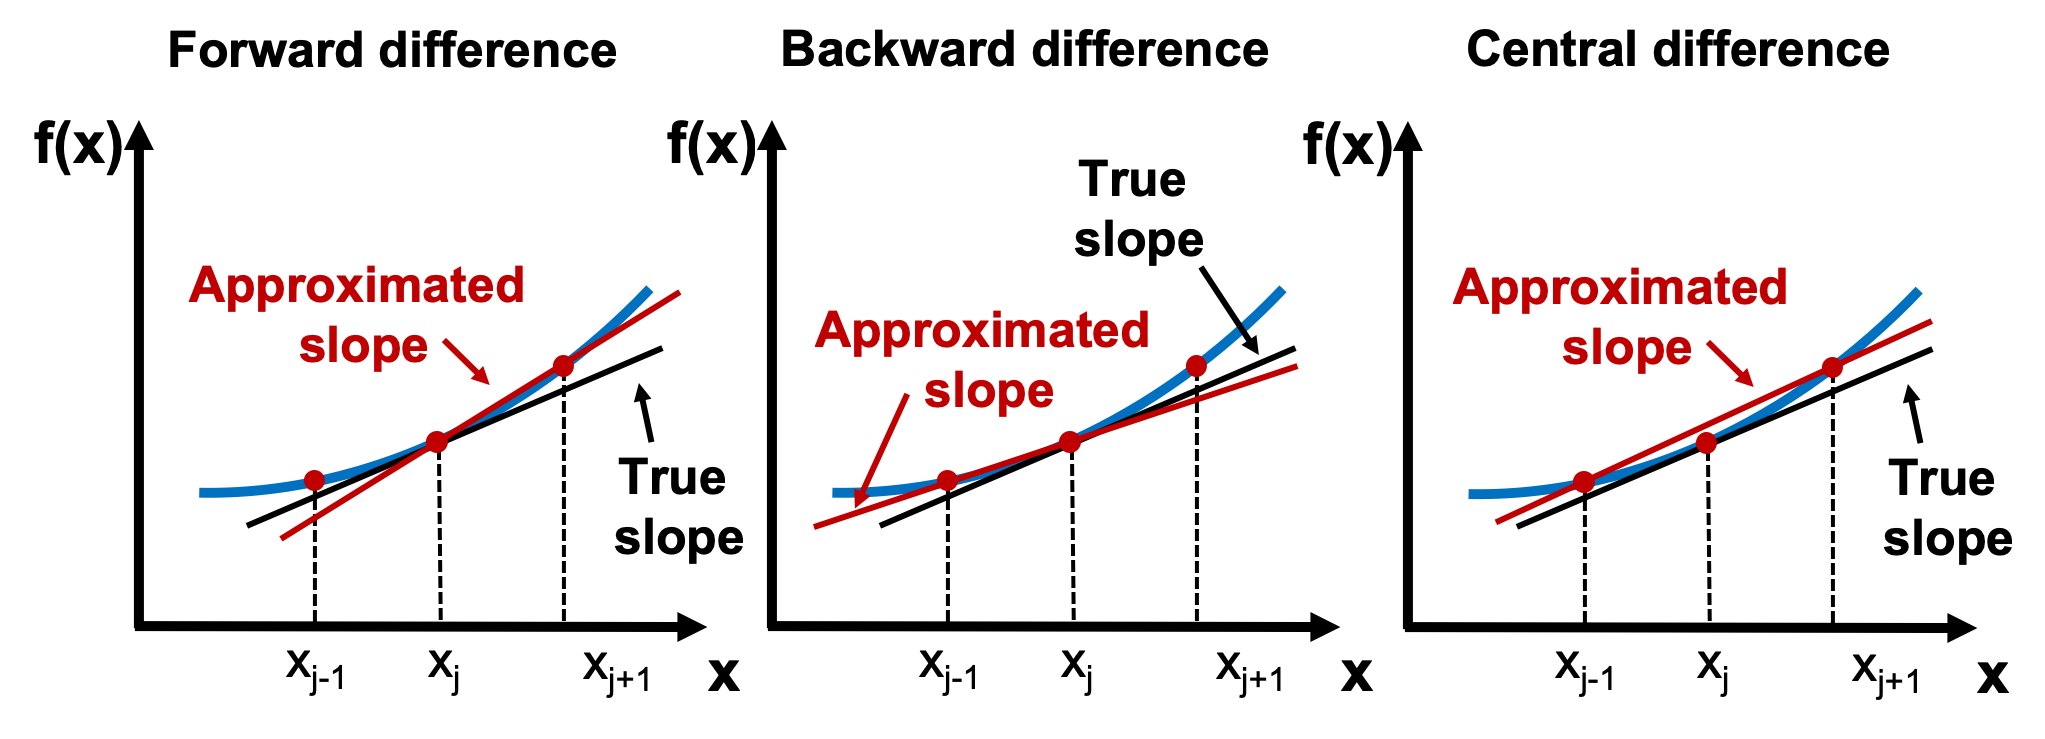

**20.3: Approximating of Higher Order Derivatives**

**20.4: Numerical Differentiation with Noise**